# 1 Data preparation

## 1.1 Data description

Data come from http://timeseriesclassification.com/description.php?Dataset=ECG5000.

Data description and preparation are based on <b> </b>
https://www.curiousily.com/posts/time-series-anomaly-detection-using-lstm-autoencoder-with-pytorch-in-python/.

The dataset contains a set of 5,000 time-series examples (obtained with ECG) with 140 timesteps. Each sequence corresponds to a single heartbeat from a single patient with congestive heart failure.

An electrocardiogram (ECG or EKG) is a test that checks how your heart is functioning by measuring the electrical activity of the heart. With each heart beat, an electrical impulse (or wave) travels through your heart. This wave causes the muscle to squeeze and pump blood from the heart. Source

Five classes are annotated:
- Normal (N)
- R-on-T Premature Ventricular Contraction (R-on-T PVC)
- Premature Ventricular Contraction (PVC)
- Supra-ventricular Premature or Ectopic Beat (SP or EB)
- Unclassified Beat (UB).

Assuming a healthy heart and a typical rate of 70 to 75 beats per minute, each cardiac cycle, or heartbeat, takes about 0.8 seconds to complete the cycle. Frequency: 60–100 per minute (Humans) Duration: 0.6–1 second (Humans).

## 1.2 Import nessesary libraries and modules

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from arff2pandas import a2p
from helpers import plot_average_class_representation

# ignore warinings
import warnings
warnings.simplefilter("ignore")

# Set the random seed
RANDOM_SEED = 42

## 1.3 Load the data

The data stored in arff format. Thanks to <b> arff2pandas </b> library we can convert this into Pandas data frames.

In [2]:
with open('./data_raw/ECG5000_TRAIN.arff') as f:
    train_set = a2p.load(f)

with open('./data_raw/ECG5000_TEST.arff') as f:
    test_set = a2p.load(f)

Combine the training and test data into a single data frame to get more data to train models.

In [3]:
dataset = train_set.append(test_set)
dataset.head()

,att1@NUMERIC,att2@NUMERIC,att3@NUMERIC,att4@NUMERIC,att5@NUMERIC,att6@NUMERIC,att7@NUMERIC,att8@NUMERIC,att9@NUMERIC,att10@NUMERIC,...,att132@NUMERIC,att133@NUMERIC,att134@NUMERIC,att135@NUMERIC,att136@NUMERIC,att137@NUMERIC,att138@NUMERIC,att139@NUMERIC,att140@NUMERIC,"target@{1,2,3,4,5}"
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


Next shuffle data.

In [4]:
dataset = dataset.sample(frac=1.0, random_state=RANDOM_SEED)
dataset.head()

,att1@NUMERIC,att2@NUMERIC,att3@NUMERIC,att4@NUMERIC,att5@NUMERIC,att6@NUMERIC,att7@NUMERIC,att8@NUMERIC,att9@NUMERIC,att10@NUMERIC,...,att132@NUMERIC,att133@NUMERIC,att134@NUMERIC,att135@NUMERIC,att136@NUMERIC,att137@NUMERIC,att138@NUMERIC,att139@NUMERIC,att140@NUMERIC,"target@{1,2,3,4,5}"
1001,1.469756,-1.048520,-3.394356,-4.254399,-4.162834,-3.822570,-3.003609,-1.799773,-1.500033,-1.025095,...,0.945178,1.275588,1.617218,1.580279,1.306195,1.351674,1.915517,1.672103,-1.039932,1
2086,-1.998602,-3.770552,-4.267091,-4.256133,-3.515288,-2.554540,-1.699639,-1.566366,-1.038815,-0.425483,...,1.008577,1.024698,1.051141,1.015352,0.988475,1.050191,1.089509,1.465382,0.799517,1
2153,-1.187772,-3.365038,-3.695653,-4.094781,-3.992549,-3.425381,-2.057643,-1.277729,-1.307397,-0.623098,...,1.085007,1.467196,1.413850,1.283822,0.923126,0.759235,0.932364,1.216265,-0.824489,1
555,0.604969,-1.671363,-3.236131,-3.966465,-4.067820,-3.551897,-2.582864,-1.804755,-1.688151,-1.025897,...,0.545222,0.649363,0.986846,1.234495,1.280039,1.215985,1.617971,2.196543,0.023843,1
205,-1.197203,-3.270123,-3.778723,-3.977574,-3.405060,-2.392634,-1.726322,-1.572748,-0.920075,-0.388731,...,0.828168,0.914338,1.063077,1.393479,1.469756,1.392281,1.144732,1.668263,1.734676,1


## 1.4 Exploratory Data Analysis

### 1.4.1 Overview

Look on dataset shape.

In [5]:
dataset.shape

(5000, 141)

Look on numeric feature.

In [6]:
dataset.describe()

,att1@NUMERIC,att2@NUMERIC,att3@NUMERIC,att4@NUMERIC,att5@NUMERIC,att6@NUMERIC,att7@NUMERIC,att8@NUMERIC,att9@NUMERIC,att10@NUMERIC,...,att131@NUMERIC,att132@NUMERIC,att133@NUMERIC,att134@NUMERIC,att135@NUMERIC,att136@NUMERIC,att137@NUMERIC,att138@NUMERIC,att139@NUMERIC,att140@NUMERIC
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,-0.936082,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,0.657945,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,-1.362068,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,-0.910487,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,-0.476660,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


We have 5,000 examples. Each row represents a single heartbeat record with 140 timesteps. Last column is a target value.

### 1.4.2 Rename the columns to make work easier

In [7]:
new_columns = list(dataset.columns)
new_columns[:-1] = [f'timiestamp_{i}' for i in range(1,len(new_columns)) ]
new_columns[-1] = 'label'
dataset.columns = new_columns

# look on changed dataset columns
dataset.head()

,timiestamp_1,timiestamp_2,timiestamp_3,timiestamp_4,timiestamp_5,timiestamp_6,timiestamp_7,timiestamp_8,timiestamp_9,timiestamp_10,...,timiestamp_132,timiestamp_133,timiestamp_134,timiestamp_135,timiestamp_136,timiestamp_137,timiestamp_138,timiestamp_139,timiestamp_140,label
1001,1.469756,-1.048520,-3.394356,-4.254399,-4.162834,-3.822570,-3.003609,-1.799773,-1.500033,-1.025095,...,0.945178,1.275588,1.617218,1.580279,1.306195,1.351674,1.915517,1.672103,-1.039932,1
2086,-1.998602,-3.770552,-4.267091,-4.256133,-3.515288,-2.554540,-1.699639,-1.566366,-1.038815,-0.425483,...,1.008577,1.024698,1.051141,1.015352,0.988475,1.050191,1.089509,1.465382,0.799517,1
2153,-1.187772,-3.365038,-3.695653,-4.094781,-3.992549,-3.425381,-2.057643,-1.277729,-1.307397,-0.623098,...,1.085007,1.467196,1.413850,1.283822,0.923126,0.759235,0.932364,1.216265,-0.824489,1
555,0.604969,-1.671363,-3.236131,-3.966465,-4.067820,-3.551897,-2.582864,-1.804755,-1.688151,-1.025897,...,0.545222,0.649363,0.986846,1.234495,1.280039,1.215985,1.617971,2.196543,0.023843,1
205,-1.197203,-3.270123,-3.778723,-3.977574,-3.405060,-2.392634,-1.726322,-1.572748,-0.920075,-0.388731,...,0.828168,0.914338,1.063077,1.393479,1.469756,1.392281,1.144732,1.668263,1.734676,1


### 1.4.3 Check class distribution

In [8]:
dataset['label'].value_counts()

1    2919
2    1767
4     194
3      96
5      24
Name: label, dtype: int64

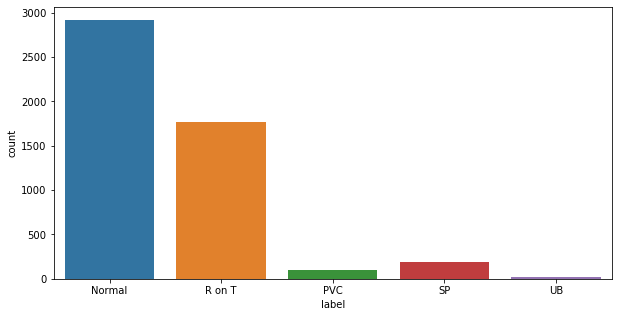

In [10]:
# name the possible class based on the description of the data
class_names = ['Normal','R on T','PVC','SP','UB']
plt.figure(figsize=(10,5))
hist = sns.countplot(dataset['label'])
hist.set_xticklabels(class_names);

The normal class, has the most examples. This is great because I will use it to train Autoencoder model.

### 1.4.4 Look at an averaged (smoothed out with one standard deviation on top and bottom of it) Time Series for each class

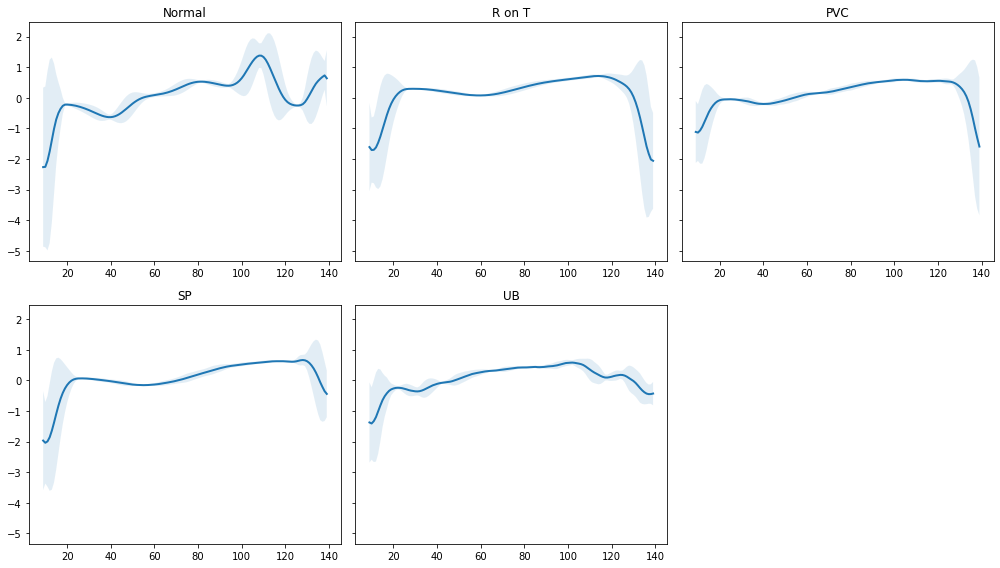

In [12]:
# create class_dict, where key-class name and value-class label in dataset
class_dict = dict()
for i, cls in enumerate(class_names,1):
    class_dict[cls] = i

plot_average_class_representation(dataset, class_dict, label='label')

As you can see normal class has a distinctly different pattern than all other classes. At the beginning there is much greater variation on normal ecg than in other classes and at the end there is an additional peak. In other classes, in most cases a significant drop occurs at the end of the ecg.

## 1.5 Prepare datasets for anomaly detection from time series data using AutoEncoder

![img](Autoencoder_schema.png)

Autoencoders try to reconstruct their input data. The trick is to use a small number of parameters, so model learns a compressed representation of the data. 

In a sense, Autoencoders try to learn only the most important features (compressed version) of the data.

When training an Autoencoder, the objective is to reconstruct the input as best as possible. This is done by minimizing a loss function (just like in supervised learning). This function is known as reconstruction loss. Cross-entropy loss and Mean squared error are common examples.

I will use normal heartbeats as training data for model. I will record the reconstruction loss on the training data. Finally, I will choose a threshold at which I will consider a heartbeat as an anomaly. But first, I need to prepare appropiate datasets

### 1.5.1 Prepare normal heartbeats dataset

In [11]:
#define normal class
CLASS_NORMAL = '1'

normal_dataset = dataset[dataset.label == CLASS_NORMAL]
normal_dataset.shape

(2919, 141)

Change normal class label type to integer

In [12]:
normal_dataset['label'] = normal_dataset['label'].astype('int')
normal_dataset['label'].dtype

dtype('int32')

### 1.5.2 Prepare anomaly heartbeats dataset

All classes other than normal will be considered anomaly

In [13]:
anomaly_dataset = dataset[dataset.label != CLASS_NORMAL]
anomaly_dataset.shape

(2081, 141)

Change all anomaly class labels to 0

In [14]:
anomaly_dataset.loc[:, -1:] = np.zeros(len(anomaly_dataset), dtype='int')
anomaly_dataset.head()

,timiestamp_1,timiestamp_2,timiestamp_3,timiestamp_4,timiestamp_5,timiestamp_6,timiestamp_7,timiestamp_8,timiestamp_9,timiestamp_10,...,timiestamp_132,timiestamp_133,timiestamp_134,timiestamp_135,timiestamp_136,timiestamp_137,timiestamp_138,timiestamp_139,timiestamp_140,label
3043,-0.321236,-1.461367,-2.365966,-2.812644,-3.068974,-3.223771,-3.089063,-2.708512,-2.105889,-1.587635,...,1.634221,1.271049,0.722839,0.022662,-0.547250,-1.499344,-2.358348,-2.601288,-2.098543,0
2851,-0.944327,-2.325608,-3.359758,-3.983659,-4.036466,-3.823508,-3.567497,-2.966022,-1.921887,-1.164849,...,-0.767044,-1.302189,-2.150204,-2.518930,-1.840903,-0.764218,0.083810,0.495001,0.326526,0
4267,0.294981,-0.651842,-1.314702,-1.836148,-1.930226,-1.995267,-2.110644,-2.097992,-1.839687,-1.446685,...,-2.084077,-2.614123,-3.297312,-3.881822,-4.233724,-3.883198,-2.741736,-2.375971,-0.870357,0
3566,-0.641464,-2.102731,-3.257956,-3.591687,-3.456362,-3.170927,-2.607660,-1.783062,-1.187110,-1.114240,...,-0.498398,-1.044345,-1.610290,-2.137711,-3.012836,-3.220379,-2.477407,-1.097606,0.312561,0
333,0.679824,-0.863884,-2.298195,-3.186748,-3.415058,-3.265813,-3.011455,-2.592667,-1.773994,-1.179463,...,-0.738676,-1.330490,-1.927671,-2.364053,-2.934549,-3.394048,-2.950691,-1.832853,-0.100349,0


## 1.6 Split data to train, validation and test sets

I will fit AutoEncoder to reconustruct train dataset as best as possible. Validation dataset will be use for parameters tuning and choose a threshold at which I will consider a heartbeat as an anomaly. Test dataset will be use for finally evaluation of model  

### 1.6.1 Split normal dataset to train, validation and test sets

In [15]:
# first split normal dataset to 2 part
train_dataset, val_normal_dataset = train_test_split(normal_dataset, test_size=0.15, random_state=RANDOM_SEED)

# next split validation dataset to 2 part
val_normal_dataset, test_normal_dataset = train_test_split(val_normal_dataset, test_size=0.5, random_state=RANDOM_SEED)

# look on shape of datasets
print(train_dataset.shape, val_normal_dataset.shape, test_normal_dataset.shape)

(2481, 141) (219, 141) (219, 141)


### 1.6.2 Split anomaly dataset to validation and test sets

Notice that anomaly dataset is previously shuffled

In [16]:
# create the validation anomaly dataset with the same shape as the normal validation dataset
val_anomaly_dataset = anomaly_dataset[:len(val_normal_dataset)]

# create the test anomaly dataset with the same shape as the normal test dataset
# take the samples from the end so that it does not overlap with the test dataset
test_anomaly_dataset = anomaly_dataset[-len(test_normal_dataset):] 

# look on shape of datasets
print(val_anomaly_dataset.shape, test_anomaly_dataset.shape)

(219, 141) (219, 141)


### 1.6.3 Merge normal and anomaly datasets and shuffle them

In [17]:
# merge and shuffle validation datasets
val_dataset = val_normal_dataset.append(val_anomaly_dataset).sample(frac=1.0, random_state=RANDOM_SEED)

# merge and shuffle test datasets
test_dataset = test_normal_dataset.append(test_anomaly_dataset).sample(frac=1.0, random_state=RANDOM_SEED)

# look on shape of datasets
print(val_dataset.shape, test_dataset.shape)

(438, 141) (438, 141)


### 1.6.4 Save datasets for future use

In [18]:
train_dataset.to_csv("./data_preprocessed/train_dataset.csv")
val_dataset.to_csv("./data_preprocessed/val_dataset.csv")
test_dataset.to_csv("./data_preprocessed/test_dataset.csv")